In [21]:
file_lines = []
for line in open('minuit.out.txt', 'r'):
    file_lines.append(line)
print('the number of lines is', len(file_lines) )
n=25
print('Prameters block:', file_lines[9:n])
parameter_lines = str(file_lines[9:n])
print('\n \n')
print(parameter_lines.split())

the number of lines is 242
Prameters block: ['    NO.   NAME         VALUE      STEP SIZE      LIMITS\n', "     2 'Bg        '  -0.61953E-01  0.27133E-01     no limits\n", "     3 'Cg        '    5.5624      0.31846         no limits\n", "     7 'Aprig     '   0.16612      0.28009E-01     no limits\n", "     8 'Bprig     '  -0.38310      0.97840E-02     no limits\n", "     9 'Cprig     '    25.000      constant\n", "    12 'Buv       '   0.81048      0.16017E-01     no limits\n", "    13 'Cuv       '    4.8235      0.63844E-01     no limits\n", "    15 'Euv       '    9.9214      0.83589         no limits\n", "    22 'Bdv       '    1.0300      0.61123E-01     no limits\n", "    23 'Cdv       '    4.8463      0.29544         no limits\n", "    33 'CUbar     '    7.0597      0.80914         no limits\n", "    34 'DUbar     '    1.5481       1.0965         no limits\n", "    41 'ADbar     '   0.26880      0.80200E-02     no limits\n", "    42 'BDbar     '  -0.12730      0.36280E-02     n

In [9]:
def main():
    file =open('minuit.out.txt', 'r')
    lines = file.readlines()
    str_lines = lines.strip().split()
    header, values = lines[104], lines[106:124]
    data_dict = {h: v for h, v in zip(header, zip(*values))}
    file.close()
    print(data_dict)
main()


AttributeError: 'list' object has no attribute 'strip'

In [3]:
import os
import re
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
print(lines[104])
for line in lines[106:124]:
    #print(line)
    #words = line.strip().split('      ')#the delimeter is 6 spaces to separate the columns
    words = re.split(r"(?: '\s+)\s*", line.strip())
    #use re noncapture group, defined as (?:...)since we dont want the separators in our 
    #result.
    #print(words[0])
    #print(words[2].split())
    values= words[2].split()
    print(values)
    #for ind, word in enumerate(split_line):
    #print(split_line)
        #print(word)
#     with open('minuit.oin.txt', 'r') as second:
#         split_line
#         second.write()
    
    
infile.close()
#line.split(0)


  EXT PARAMETER                APPROXIMATE        STEP         FIRST   



IndexError: list index out of range

Explanation of the minuit.in.txt format:

set title new 13p HERAPDF parameters 1 'Ag' 0.0000 0. 2 'Bg' -0.226958 1.126400e-03 .....

The first 3 lines set title and announces MINUIT the list of parameters
The index of parameters is the first column and it is hardwired to the source code.
1 -10 gluon parameters
11-20 uval parameters 21-30 dval parameters 31-40 Ubar parameters 41-50 Dbar parameters 51-60 U parameters 61-70 D parameters 71-80 Sea parameters 81-90 Delta parameters 91-100 other parameters: alphas (95), fs=Dbar/str (96), fc=Ubar/ch (97)

second column represents just user defined names
third column: input value for the parameter
forth column: step size (usually chosen of the same order as of the error) IMPORTANT: -> if step size value is 0. then this parameter is FIXED
fifth colum: lower boundary of the fit parameter
sixth column: upper boundary of the fit parameter -> if boundaries are not mentioned then there are no boundaries!

## Workflow

go to example_run directory. mkdir run. cp example_run/* run. cd run. xfitter. cd output. python generate_datasets.py.

See how 
#! /bin/bash

for ((i=0; i=100; i++))
    do cp example_run/input/steerings.txt dataset_{}.format(i)
    do cp example_run/input/ewparaparams.txt
    cp example_run/input/minuit.in_{}.txt.format(i) dataset_{}/minuit.txt.format(i)
    cd dataset_{i}
    mkdir run
    cp input/* run
    cd run
    xfitter
    

In [111]:
import os
import re; import pandas as pd; import numpy as np
params=[]
generated_params = []
error_list=[]
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
#print(lines[104])
# for line in lines[106:109, 111:120]:
from itertools import *
#make a chain iterator of our wanted lines from the output file, we want to exclude
#those lines that have "constant" for the error, since these are not the PDF parameters and we can't use them
chain = chain(islice(lines, 106, 111), islice(lines, 111, 121))
chain_cov_mat = islice(lines, 127, 143)

#for line in lines[106:121]:
for line in chain:
    #print(line)
    #words = line.strip().split('\s+')#the delimeter is 6 spaces to separate the columns
    words = line.strip().split()
    
    #words = re.split(r"(?: '\s*)\s*", line.strip())
    #df = pd.read_table(words)
    #use re noncapture group, defined as (?:...)since we dont want the separators in our 
    #result.
    #print(words[2])
    values= words[2]
    errors=words[3]
    #print(errors)
    for value in values.split():
#         #print(i)
         params.append(float(value))
    for error in errors.split():
        if error =='constant':
            #'constant' just means the parameter does not have error!
            error_list.append(0.0)
        else:
            error_list.append(float(error))
    

infile.close()
params = np.asarray(params); error_list =np.asarray(error_list)



#############GENERATE UNIFORM PARAMETERS
generated_uniform_params=[]
for i in range(len(params)):
    param, error = params[i], error_list[i]
    generated_param = np.random.uniform(low = param-error, high=param+error)
    generated_uniform_params.append(generated_param)

    
    
    
print( params, generated_uniform_params, '\n\n', len(params), len(generated_uniform_params))

[-0.061856  5.5593    0.16618  -0.383    25.        0.81056   4.8239
  9.9226    1.0301    4.8456    7.0603    1.5439    0.26877  -0.12732
  9.581   ] [-0.06966571905370611, 5.563688751031607, 0.1792346250996238, -0.38654151775986206, 25.0, 0.8137621131401542, 4.848676826891658, 9.654842285126184, 1.0267248963647129, 4.789288836705311, 6.842690765965166, 1.761644995411807, 0.26490801001898967, -0.12625911462960124, 10.180599534230634] 

 15 15


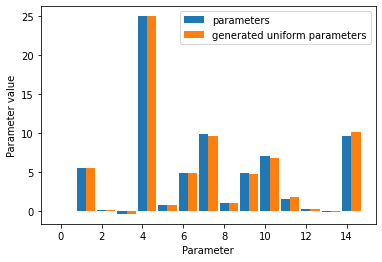

In [122]:
import matplotlib.pyplot as plt
x_pos = np.arange(len(params))
widths = 0.45
plt.bar(x_pos, params, widths, label='parameters')
plt.bar(x_pos + widths, generated_uniform_params, widths, label='generated uniform parameters')
plt.xlabel('Parameter'); plt.ylabel('Parameter value')
plt.legend()


### Extracting the Covariance Matrix

In [123]:
for line in lines[127:143]:
    rows = line.strip().split('\n')
    triang_rows = rows[0]
#     for row in triang_rows.split('\n'):

#     for row in triang_rows.strip().split('\s'):
    for row in triang_rows.strip().split('\s'):

        print(row, '\n')

0.632E-03 

0.872E-03 0.117E-01 

-0.844E-03-0.893E-03 0.120E-02 

-0.122E-03-0.150E-03 0.197E-03 0.581E-04 

0.937E-05 0.223E-04-0.833E-05-0.198E-05 0.287E-04 

0.460E-04-0.829E-04-0.565E-04-0.914E-05 0.403E-04 0.861E-03 

0.165E-03 0.298E-04-0.274E-03-0.198E-04-0.574E-03 0.421E-02 0.755E-01 

0.510E-04 0.855E-04-0.644E-04-0.101E-04-0.111E-04-0.975E-05-0.446E-03 0.540E-03 

0.246E-03-0.593E-03-0.290E-03-0.491E-04 0.140E-04-0.398E-03 0.296E-02 0.170E-02 0.158E-01 

0.935E-03-0.214E-02-0.136E-02-0.173E-03 0.242E-03 0.473E-03 0.194E-03 0.662E-03 0.120E-03 0.498E-01 

-0.191E-02 0.429E-02 0.264E-02 0.335E-03-0.221E-03-0.661E-03 0.638E-02-0.487E-03-0.170E-02 0.253E-01 0.982E-01 

-0.774E-05 0.139E-04 0.497E-05 0.232E-05 0.327E-05-0.318E-06 0.436E-04 0.570E-05 0.243E-06 0.168E-04-0.739E-04 

0.156E-04 

-0.558E-05-0.582E-06 0.425E-05 0.155E-05 0.768E-06-0.388E-07 0.580E-05 0.193E-05-0.315E-05 0.182E-04-0.388E-04 

0.518E-05 0.304E-05 

0.349E-02-0.135E-01-0.437E-02-0.589E-03 0.215E-03 0.131

In [125]:
# for line in chain_cov_mat:
#     row = line.strip().split()
#     for i in range(14):
#         for row_val in row[i].split():
            
#             for j in range(14):
#                 for col_val in row[i][j].split():
#                     COV[row_val][col] = float(row[i][j])
cov_list=[]
COV = np.empty((14,14))

# delimeters = "-", " "
# regexPattern = '|'.join(map(re.escape, delimiters))
pattern = re.compile(r'[\s\S.\d\D\w\W]\d\.\d\d\d[E]-\d\d')
#matches = pattern.finditer(text_to_search)
# for match in matches:
#     print(match)
for line in lines[127:143]:
    rows = line.strip().split('\n')
    triang_rows = rows[0]
#     for row in triang_rows.split('\n'):

#     for row in triang_rows.strip().split('\s'):
    for row in triang_rows.strip().split('\s'):

        matches = pattern.finditer(row)
        inner_list=[]
        for match in matches:
            inner_list.append(float(row[match.span()[0]:match.span()[1]]))
            #cov_list.append(float(row[match.span()[0]:match.span()[1]]))
        cov_list.append(inner_list)
            
#         split_row = re.split(regexPattern, row)
#         for val in split_row:
#             cov_list.append(float(val))
        
        #for val in row:
            
#     for value in value_0:
        
#         cov_list.append(float(value))
cov_list

[[],
 [0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05],
 [2.23e-05, -8.33e-06, -1.98e-06, 2.87e-05],
 [-8.29e-05, -5.65e-05, -9.14e-06, 4.03e-05, 0.000861],
 [2.98e-05, -0.000274, -1.98e-05, -0.000574, 0.00421, 0.0755],
 [8.55e-05, -6.44e-05, -1.01e-05, -1.11e-05, -9.75e-06, -0.000446, 0.00054],
 [-0.000593, -0.00029, -4.91e-05, 1.4e-05, -0.000398, 0.00296, 0.0017, 0.0158],
 [-0.00214,
  -0.00136,
  -0.000173,
  0.000242,
  0.000473,
  0.000194,
  0.000662,
  0.00012,
  0.0498],
 [-0.00191,
  0.00429,
  0.00264,
  0.000335,
  -0.000221,
  -0.000661,
  0.00638,
  -0.000487,
  -0.0017,
  0.0253,
  0.0982],
 [-7.74e-06,
  1.39e-05,
  4.97e-06,
  2.32e-06,
  3.27e-06,
  -3.18e-07,
  4.36e-05,
  5.7e-06,
  2.43e-07,
  1.68e-05,
  -7.39e-05],
 [],
 [-5.58e-06,
  -5.82e-07,
  4.25e-06,
  1.55e-06,
  7.68e-07,
  -3.88e-08,
  5.8e-06,
  1.93e-06,
  -3.15e-06,
  1.82e-05,
  -3.88e-05],
 [3.04e-06],
 [-0.0135,
  -0.00437,
  -0.000589,
  0.000215,
  1.31e-05,
 

In [129]:
cov_list[0] = [0.632e-03]
cov_list[1] = [0.872E-03, 0.117E-01]
cov_list[:4]

[[0.000632],
 [0.000872, 0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05]]

In [137]:
cov_list =[el for el in cov_list if el !=[]]

In [138]:
len(cov_list)

15

In [139]:
length = max(map(len, cov_list))
cov = np.array([xi+[None]*(length-len(xi)) for xi in cov_list])
cov.shape

(15, 11)

Now that we have the fit parameters extracted from minuit.out.txt, and we have generated new parameters given the uncertainties in these new parameters, we write those new generated parameters to new minuit.in.txt files, to do new fits with those new generated parameters. Below we write new minuit.in.txt files given those new generated parameter values

In [71]:
############WRITE GENERATED PARAMETERS INTO NEW MINUIT.IN FILE
with open('minuit_ex.in.txt', 'w') as second:
    second.write('set title\n')
    second.write('new  14p HERAPDF\n')
    second.write('parameters\n')
    #lets put 0 for the fourth column, meaning that this parameter is fixed
    second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(generated_params[0])+ '    '+'0.\n')
    second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(generated_params[1])+ '    '+'0.\n')
    second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(generated_params[2])+ '    '+'0.\n')
    second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(generated_params[3])+ '    '+'0.\n')
    second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(generated_params[4])+ '    '+'0.\n')
    second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(generated_params[5])+ '    '+'0.\n')
    second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(generated_params[6])+ '    '+'0.\n')
    second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(generated_params[7])+ '    '+'0.\n')
    second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(generated_params[8])+ '    '+'0.\n')
    second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(generated_params[9])+ '    '+'0.\n')
    second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(generated_params[10])+ '    '+'0.\n')
    second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(generated_params[11])+ '    '+'0.\n')
    second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(generated_params[12])+ '    '+'0.\n')
    second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(generated_params[13])+ '    '+'0.\n')
    second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(generated_params[14])+ '    '+'0.\n')
    second.write('\n\n\n')
    second.write('migrad 200000\n')
    second.write('hesse\n')
    second.write('hesse\n')
    second.write('set print 3\n\n')
    second.write('return')
#we dont have to close it since we are using a context manager "with open()"

### To do: 
Automate everything with class and formatting. We can also do it with formatting options of course, using .format(...).
This is just a proof of concept experiment



### Using numpy

In [1]:
import itertools as IT
with open(filename, 'r') as f:
    lines = IT.chain(IT.islice(f, 0, 4), IT.islice(f, 5, 14) )
arr = np.genfromtxt(lines)

In [25]:
import numpy as np
#make a list of dtypes for each of the columns that we want

dtype1 = np.dtype([('NO.', 'int'), ('NAME', 'str'), ('VALUE', 'float32'), ('ERROR', 'float32')])
a = np.loadtxt(filename, dtype=dtype1, skiprows=106,  max_rows=4, usecols=(0, 1, 2, 3))
#np.loadtxt(filename, dtype)
a['VALUE']

array([-0.061856,  5.5593  ,  0.16618 , -0.383   ], dtype=float32)

In [6]:
words

['43', 'CDbar', '9.5810', '0.60834', '0.53648E-02', '0.24546E-02']

### Using Pandas

In [16]:
import pandas as pd
df = pd.read_csv(filename, names=['NO','NAME','VALUE','ERROR'])[95:112]
#pd.read_csv(filename)ERROR
df.NO.apply(lambda x: pd.Series(str(x).split("\s+")))
#df.columns=['NO','NAME','VALUE','ERROR']

In [138]:
len(np.array(means))
means=np.array(means).astype(np.float)
means

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([-0.061856,  5.5593  ,  0.16618 , -0.383   , 25.      ,  0.81056 ,
        4.8239  ,  9.9226  ,  1.0301  ,  4.8456  ,  7.0603  ,  1.5439  ,
        0.26877 , -0.12732 ,  9.581   ,  0.118   ,  0.4     ,  0.      ])

In [131]:

def covariance_matrix(X):
    m = len(X) 
    mean = np.mean(X)
    cov_matrix = (X - mean).T.dot((X - mean)) / m-1
    np.random.seed(2020)
    return cov_matrix + 0.00001 
cov_mat_sig = np.array(covariance_matrix(means))
cov_mat_sig

array(36.26220508)

In [50]:
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
with open('minuit.in.txt', 'w') as second:
    for line in lines[9:n]:
        split_line = line.strip().split('      ')#the delimeter is 6 spaces to separate the columns
        for i in split_line:
            second.write(i)
infile.close()
second.close()